In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("production.csv")

In [6]:
country = ['Argentina', 'Chile', 'Colombia', 'Ecuador', 'Perú', 'Bolivia', 'Panamá', 'Costa Rica', 'México']

In [7]:
df_cleaned = df[df['Country Name'].isin(country)].drop(columns=['Country Code', 'Indicator Name', 'Indicator Code']).set_index('Country Name').transpose()

In [8]:
df_cleaned = df_cleaned.reset_index().rename(columns={'index': 'year'}).reset_index(drop=True)

In [9]:
df_cleaned = df_cleaned[df_cleaned.Colombia.notna()]

In [12]:
df_cleaned.year = df_cleaned.year.astype(int)
df_cleaned = df_cleaned[df_cleaned.year > 2017]

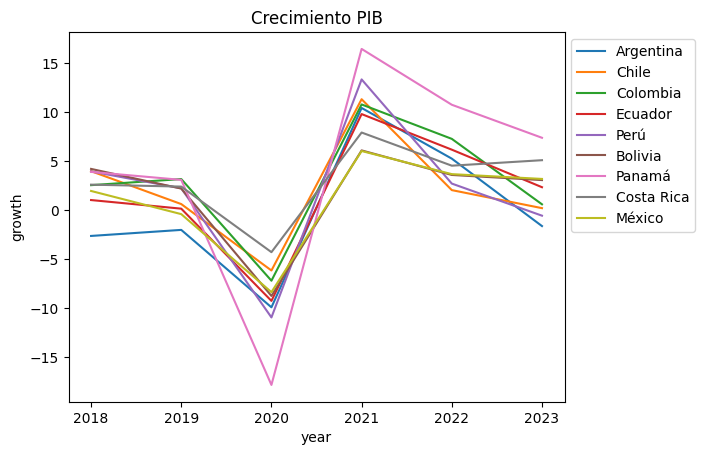

In [13]:
# Create the plot
for c in country:
    plt.plot(df_cleaned.year, df_cleaned[c], label=c) 

# Add title and labels
plt.title('Crecimiento PIB')
plt.xlabel('year')
plt.ylabel('growth')

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()



-----------------------

In [27]:
from typing import List

def plot_country_pib_year_range(min_year: int, max_year: int, country_list: List[str]) -> None:
    """
    Visualizes the GDP growth for specified countries over a given range of years.

    This function filters the World Bank GDP dataset for the selected countries,
    cleans and adjusts the data, and then plots the GDP growth for each country 
    within the specified year range. The plot includes a horizontal line at y=0 
    and a legend to identify each country's data.

    """
    
    # Filter the data for the selected countries
    df_cleaned = df[df['Country Name'].isin(country_list)] \
        .drop(columns=['Country Code', 'Indicator Name', 'Indicator Code']) \
        .set_index('Country Name') \
        .transpose()

    # Reset the index and rename the columns
    df_cleaned = df_cleaned.reset_index() \
        .rename(columns={'index': 'year'}) \
        .reset_index(drop=True)

    # Remove rows with missing data for the first country in the list
    df_cleaned = df_cleaned[df_cleaned[country_list[0]].notna()]

    # Convert the year column to integers
    df_cleaned.year = df_cleaned.year.astype(int)

    # Filter the data by the given year range
    df_cleaned = df_cleaned[df_cleaned.year >= min_year]
    df_cleaned = df_cleaned[df_cleaned.year <= max_year]

    # Plot the GDP growth for each country in the list
    for country in country_list:
        plt.plot(df_cleaned.year, df_cleaned[country], label=country)

    # Add title and labels
    plt.title('GDP Growth')
    plt.xlabel('Year')
    plt.ylabel('Growth')
    plt.axhline(0, color='black', linestyle='--', linewidth=1)

    # Add a legend
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    # Show the plot
    plt.show()


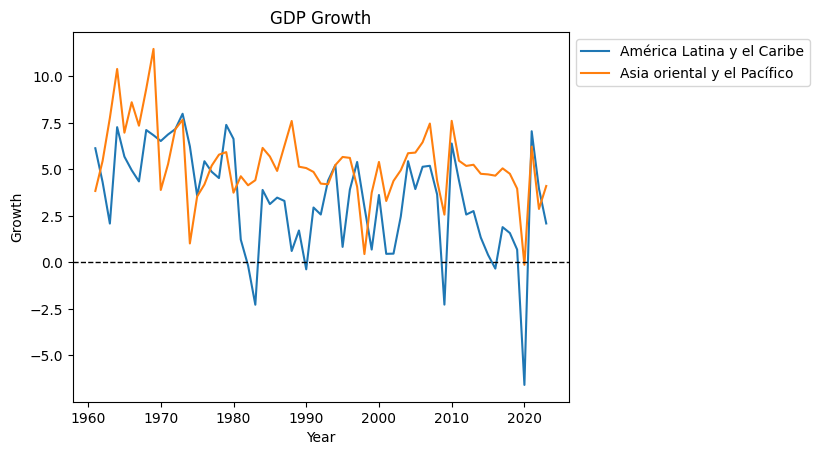

In [28]:
plot_country_pib_year_range(1961, 2023, ['América Latina y el Caribe',
                                         # 'Europa y Asia central',
                                         # "Oriente Medio y Norte de África",
                                         # "Asia meridional",
                                         "Asia oriental y el Pacífico"
                                        ])

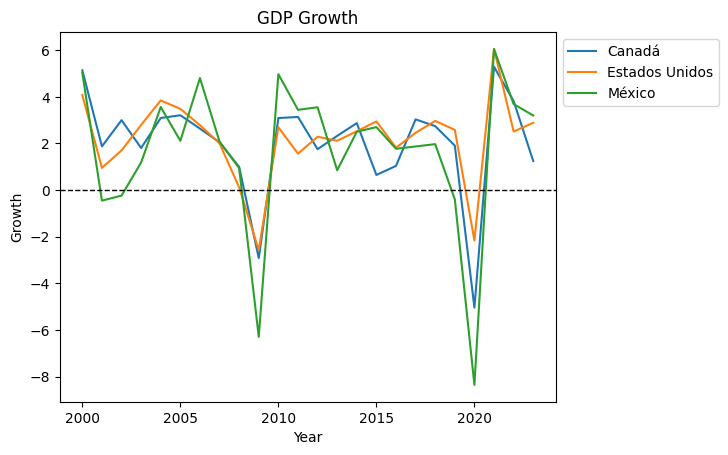

In [29]:
plot_country_pib_year_range(2000, 2023, ['Canadá',
                                         "Estados Unidos",
                                         # "Costa Rica",
                                         # "Honduras",
                                         "México",
                                         # "Nicaragua"
                                        ])

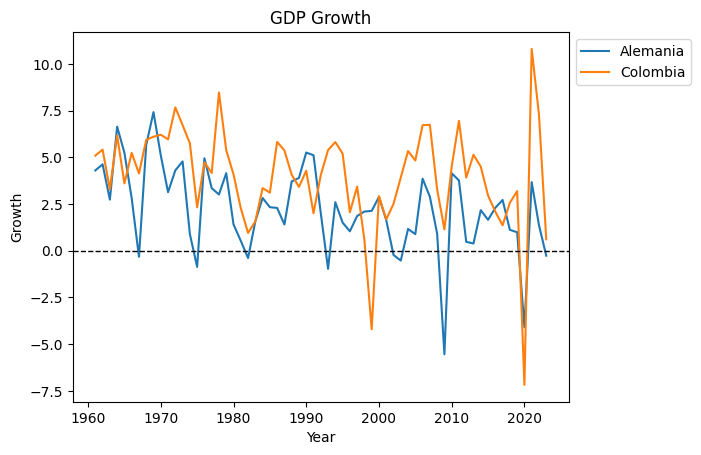

In [30]:
plot_country_pib_year_range(1960, 2023, ['Alemania',
                                         'Colombia'
                                        ])

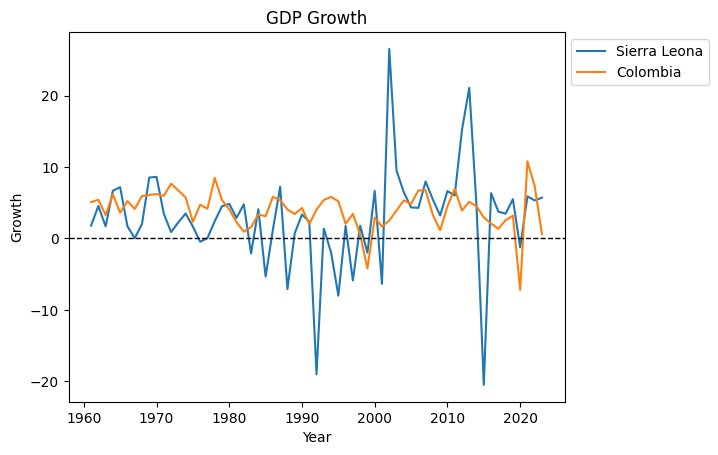

In [31]:
plot_country_pib_year_range(1960, 2023, ['Sierra Leona',
                                         'Colombia'
                                        ])

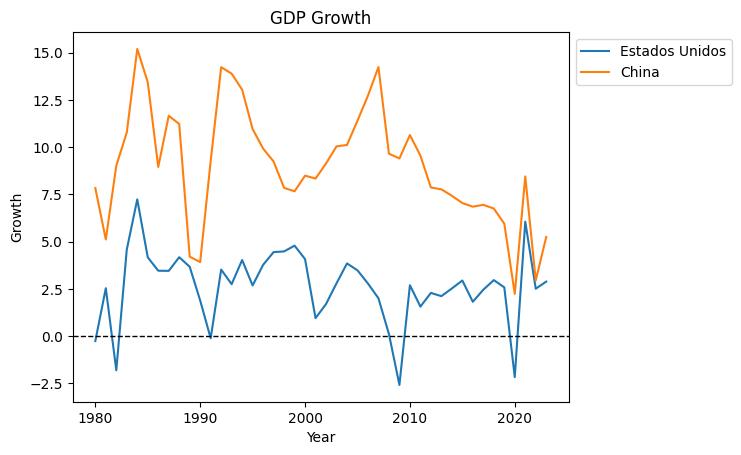

In [77]:
plot_country_pib_year_range(1980, 2023, ['Estados Unidos',
                                         'China'
                                        ])

In [ ]:
plot_country_pib_year_range(1980, 2023, ['India',
                                         'China'
                                        ])

In [48]:
df['Country Name'].unique()

array(['Aruba', nan, 'Afganistán', 'Angola', 'Albania', 'Andorra',
       'El mundo árabe', 'Emiratos Árabes Unidos', 'Argentina', 'Armenia',
       'Samoa Americana', 'Antigua y Barbuda', 'Australia', 'Austria',
       'Azerbaiyán', 'Burundi', 'Bélgica', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrein', 'Bahamas',
       'Bosnia y Herzegovina', 'Belarús', 'Belice', 'Bermudas', 'Bolivia',
       'Brasil', 'Barbados', 'Brunei Darussalam', 'Bhután', 'Botswana',
       'República Centroafricana', 'Canadá',
       'Europa Central y del Báltico', 'Suiza', 'Islas del Canal',
       'Chile', 'China', "Côte d'Ivoire", 'Camerún',
       'Congo, República Democrática del', 'Congo, República del',
       'Colombia', 'Comoras', 'Cabo Verde', 'Costa Rica',
       'Estados pequeos del Caribe', 'Cuba', 'Curacao', 'Islas Caimán',
       'Chipre', 'República Checa', 'Alemania', 'Djibouti', 'Dominica',
       'Dinamarca', 'República Dominicana', 'Argelia',
       'Asia oriental y el P

In [79]:

def plot_country_pib_index_year_range(min_year: int, max_year: int, country_list: List[str]) -> None:
    """
    Visualizes the GDP growth for specified countries over a given range of years.

    This function filters the World Bank GDP dataset for the selected countries,
    cleans and adjusts the data, and then plots the GDP growth for each country 
    within the specified year range. The plot includes a horizontal line at y=0 
    and a legend to identify each country's data.

    """
    
    # Filter the data for the selected countries
    df_cleaned = df[df['Country Name'].isin(country_list)] \
        .drop(columns=['Country Code', 'Indicator Name', 'Indicator Code']) \
        .set_index('Country Name') \
        .transpose()


    # Reset the index and rename the columns
    df_cleaned = df_cleaned.reset_index() \
        .rename(columns={'index': 'year'}) \
        .reset_index(drop=True)

    # Remove rows with missing data for the first country in the list
    df_cleaned = df_cleaned[df_cleaned[country_list[0]].notna()]

    # Convert the year column to integers
    df_cleaned.year = df_cleaned.year.astype(int)

    # Filter the data by the given year range
    df_cleaned = df_cleaned[df_cleaned.year >= min_year]
    df_cleaned = df_cleaned[df_cleaned.year <= max_year]

    new_dataset = df_cleaned.copy()

    for c in country_list:
        for i in range(len(df_cleaned.index)):
            if i == 0:
                new_dataset[c].iloc[i] = 100
            else:
                new_dataset[c].iloc[i] = new_dataset[c].iloc[i-1] * (1+(df_cleaned[c].iloc[i-1]/100))

    # Plot the GDP growth for each country in the list
    for country in country_list:
        plt.plot(new_dataset.year, new_dataset[country], label=country)

    # Add title and labels
    plt.title('GDP Growth')
    plt.xlabel('Year')
    plt.ylabel('Growth')

    # Add a legend
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    # Show the plot
    plt.show()



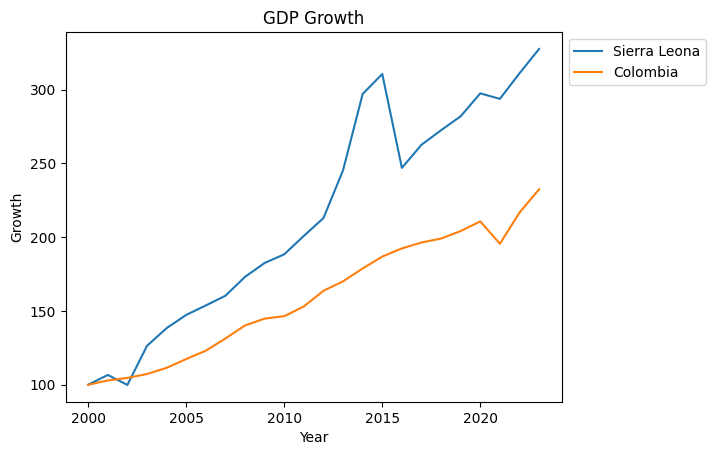

In [59]:
plot_country_pib_index_year_range(2000, 2023, ['Sierra Leona',
                                         'Colombia'
                                        ])

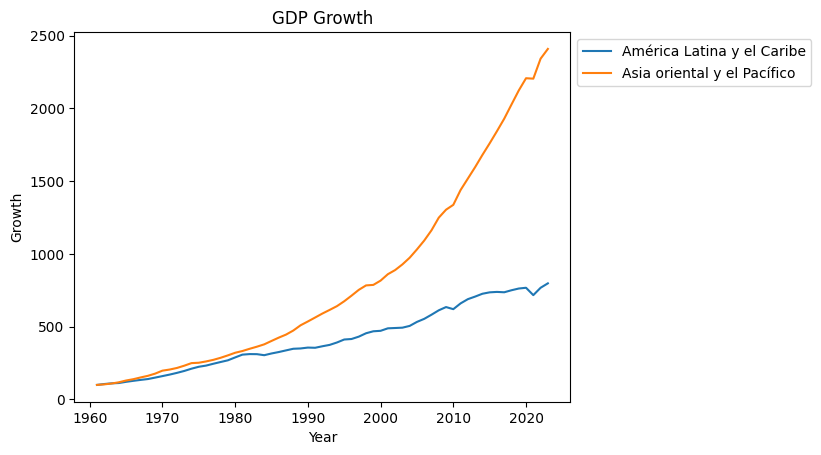

In [63]:
plot_country_pib_index_year_range(1960, 2023, ['América Latina y el Caribe',
                                         # 'Europa y Asia central',
                                         # "Oriente Medio y Norte de África",
                                         # "Asia meridional",
                                         "Asia oriental y el Pacífico"
                                        ])

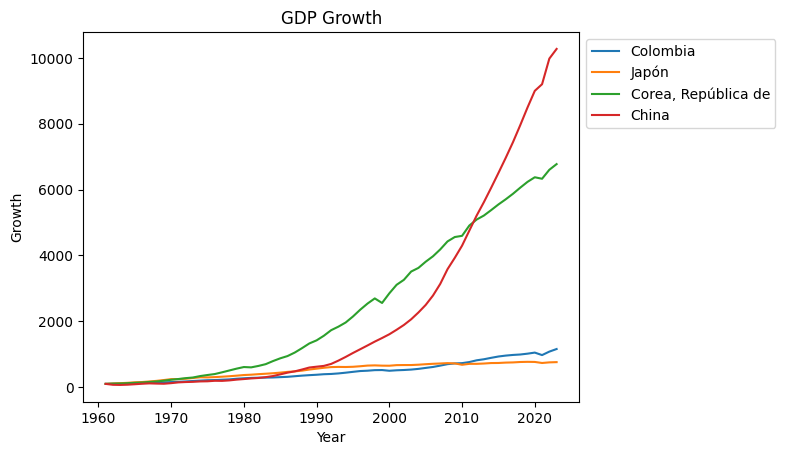

In [80]:
plot_country_pib_index_year_range(1960, 2023, ['Colombia',
                                         "Japón",
                                         "Corea, República de",
                                         "China"
                                        ])

In [81]:
dataset_test[['year', 'China']].to_csv('china_dataset.csv', index=False)

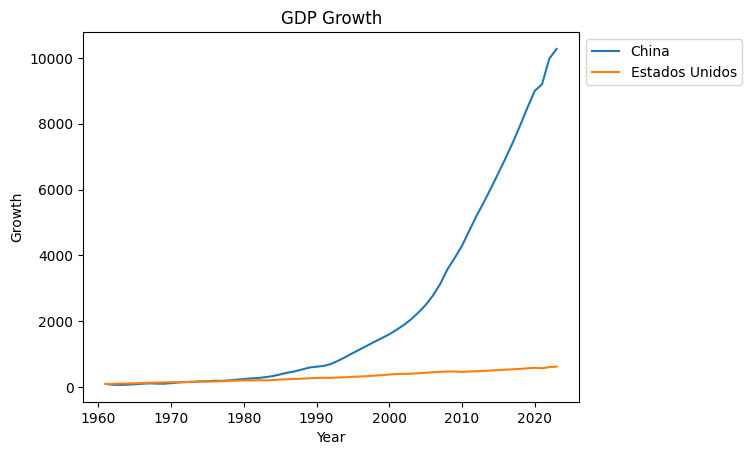

In [83]:
plot_country_pib_index_year_range(1960, 2023, ['China',
                                         'Estados Unidos'
                                        ])

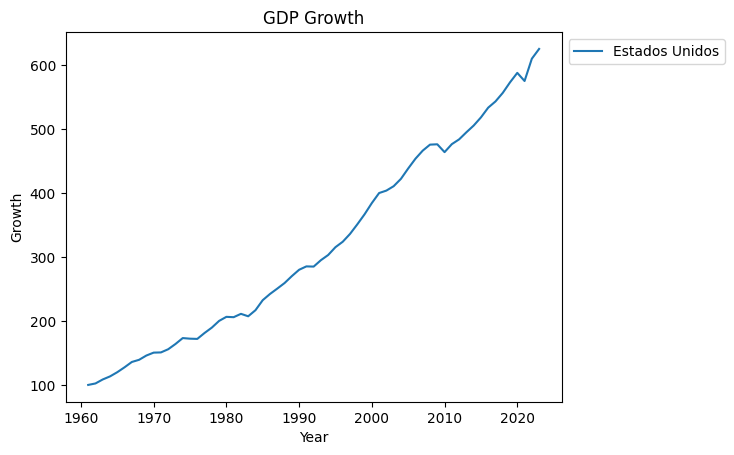

In [84]:
plot_country_pib_index_year_range(1960, 2023, [
                                         'Estados Unidos'
                                        ])

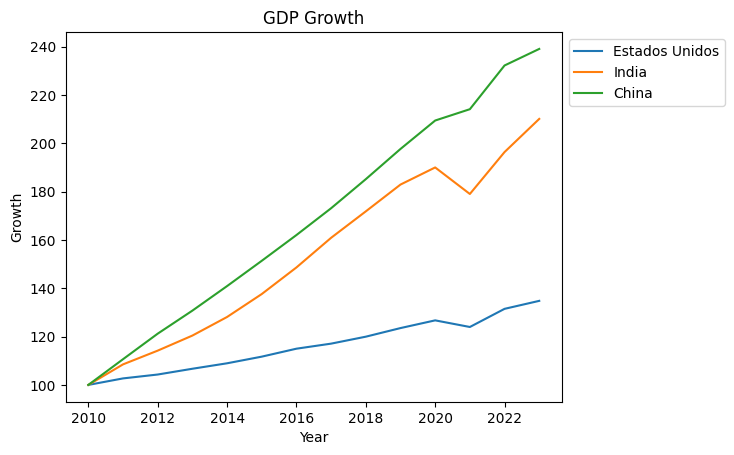

In [87]:
plot_country_pib_index_year_range(2010, 2023, [
                                         'Estados Unidos',
    'India', 'China'
                                        ])